<a href="https://colab.research.google.com/github/ManDes71/Rakuten_Text_Classification_ML/blob/main/notebooks/Exploration_Rakuten_Sac_de_mots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Colab -> Cette cellule est à executer (1 fois) pour le cloner le dépot en local**  

In [1]:
!git clone https://github.com/ManDes71/Rakuten_Text_Classification_ML.git

Cloning into 'Rakuten_Text_Classification_ML'...
remote: Enumerating objects: 562, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 562 (delta 52), reused 21 (delta 13), pack-reused 468
Receiving objects: 100% (562/562), 66.38 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (281/281), done.
Updating files: 100% (66/66), done.
Filtering content: 100% (5/5), 1.41 GiB | 32.98 MiB/s, done.


**Google Colab -> Cette cellule est à executer (2 fois) pour installer les bibliothèques nécessaires**  
You must restart the runtime in order to use newly installed versions.

In [1]:
import sys
sys.path.append('/content/Rakuten_Text_Classification_ML/src')
!pip install -r /content/Rakuten_Text_Classification_ML/requirements.txt

In [4]:
import configparser
config = configparser.ConfigParser()
config.read('/content/Rakuten_Text_Classification_ML/Rakuten_config_colab.ini')
def get_RACINE_DOSSIER() :
    return config['DOSSIER']['RACINE_DOSSIER']
print( get_RACINE_DOSSIER())

/content/Rakuten_Text_Classification_ML/input/


In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
#import rea
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 100)

In [5]:
# lecture des données sources d'entrainement
df_feats=pd.read_csv(get_RACINE_DOSSIER() + 'X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv(get_RACINE_DOSSIER() + 'Y_train_CVw08PX.csv')


# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

# récupération du fichier df_langue.csv
df_langue=pd.read_csv(get_RACINE_DOSSIER() + 'df_langue.csv')
df=df.merge(df_langue.drop(['Unnamed: 0','prdtypecode'], axis=1),on='Id',how='inner')

Lcat=df_target.sort_values(by='prdtypecode')['prdtypecode'].unique()


nomenclature=pd.read_csv(get_RACINE_DOSSIER() + 'NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']

#
stopwordFR = pd.read_csv(get_RACINE_DOSSIER() + 'stopwords_FR_02.csv')
df_top_40=pd.DataFrame()

In [6]:
print(df[['designation','PAYS_LANGUE']].head(10))

"""
df['mots']=df.apply( lambda x : dictionarize(str(x.designation),str(x.PAYS_LANGUE)),axis=1 )
df['mots'].head(10)

"""


                                                                                           designation  \
0             Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris -...   
2                         Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style   
3                                      Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt)   
4                                                                                 La Guerre Des Tuques   
5                                    Afrique Contemporaine N° 212 Hiver 2004 - Dossier Japon / Afrique   
6                                                           Christof E: Bildungsprozessen Auf Der Spur   
7                   Conquérant Sept Cahier Couverture Polypro 240 X 320 Mm 96 Pages 90g Seyès Incolore   
8                                             

"\ndf['mots']=df.apply( lambda x : dictionarize(str(x.designation),str(x.PAYS_LANGUE)),axis=1 )\ndf['mots'].head(10)\n\n"

##**Liste des 40 mots les plus fréquents par categorie**  
**je compte le nombre d'occurences de chaque mot dans chaque catégorie**

In [7]:
vect=CountVectorizer(min_df=4, stop_words=stopwordFR['MOT'].tolist())
TailleCat ={}
for c in Lcat:
    df_cat=df[df['prdtypecode']==c]
    vect=vect.fit(df_cat['designation'])
    TailleCat[c]=len(vect.vocabulary_)
    print("Catégorie : ",c,"   Nombre de mots : ",  TailleCat[c])
    bag_of_words=vect.transform(df_cat['designation'])
    word_occurrences = np.sum(bag_of_words, axis=0)
    words = vect.get_feature_names_out()
    word_occurrences_dict = dict(zip(words, word_occurrences.tolist()[0]))
    top_40_words = sorted(word_occurrences_dict.items(), key=lambda x: x[1], reverse=True)[:40]
    dfout=pd.DataFrame(top_40_words,columns=['mot','occurence'])
    #print(dfout['occurence'].head(40))
    dfout['occurence'] = dfout['occurence'][:-1]
    #print(dfout['occurence'].head(40))
    dfout['occurence'] = dfout['occurence']
    dfout['prdtypecode']=c
    for word, occurrences in top_40_words:
        print(f"{word}: {occurrences}")
    df_top_40=pd.concat([df_top_40,dfout])


Catégorie :  10    Nombre de mots :  843
tome: 154
edition: 127
guide: 84
histoire: 84
france: 60
vie: 55
art: 50
collection: 48
book: 47
journal: 35
life: 35
édition: 35
livre: 34
volume: 34
saint: 33
paris: 32
cours: 28
grand: 27
droit: 26
world: 26
monde: 24
guerre: 23
history: 23
pratique: 23
revue: 23
français: 21
jean: 21
nos: 21
science: 21
temps: 21
ans: 20
cd: 20
siècle: 20
pays: 19
homme: 18
oeuvres: 18
vol: 18
100: 17
europe: 17
lettres: 17
Catégorie :  40    Nombre de mots :  759
import: 584
jeu: 384
magideal: 282
pc: 235
allemand: 226
edition: 194
japonais: 166
xbox: 109
version: 106
nintendo: 100
anglais: 81
complet: 78
jap: 77
jeux: 73
360: 70
ensemble: 70
japon: 64
câble: 62
ds: 62
playstation: 61
ps4: 61
game: 58
collection: 53
wii: 53
console: 51
contrôleur: 50
ps3: 50
audio: 49
one: 47
super: 47
world: 47
sony: 46
protection: 44
collector: 42
us: 42
pack: 40
adaptateur: 38
ii: 38
manette: 36
uk: 36
Catégorie :  50    Nombre de mots :  624
nintendo: 356
jeu: 336
manet

**je créé un DataFramme des 40 mots les plus fréquents par catégorie**

In [9]:
df_top_40['occurence'].fillna(0,inplace=True)
print(df_top_40.info())

df_top_40.to_csv(get_RACINE_DOSSIER() + 'Top40.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 39
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mot          1080 non-null   object 
 1   occurence    1080 non-null   float64
 2   prdtypecode  1080 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.8+ KB
None


In [10]:
print("Exemple de la catégorie 40 : ",catdict[40])
df1=df_top_40[df_top_40['prdtypecode']==40]

df1.sort_values(by='occurence',ascending=False)

Exemple de la catégorie 40 :  jeux video pour pc et consoles


,mot,occurence,prdtypecode
0,import,584.0,40
1,jeu,384.0,40
2,magideal,282.0,40
3,pc,235.0,40
4,allemand,226.0,40
5,edition,194.0,40
6,japonais,166.0,40
7,xbox,109.0,40
8,version,106.0,40
9,nintendo,100.0,40


In [11]:
print("Exemple de la catégorie 50 : ",catdict[50])
df2=df_top_40[df_top_40['prdtypecode']==50]

df2.sort_values(by='occurence',ascending=False)

Exemple de la catégorie 50 :   accesoires jeux video


,mot,occurence,prdtypecode
0,nintendo,356.0,50
1,jeu,336.0,50
2,manette,246.0,50
3,console,242.0,50
4,ps4,235.0,50
5,xbox,177.0,50
6,playstation,163.0,50
7,protection,154.0,50
8,switch,147.0,50
9,noir,131.0,50


##**Matrice de semblarité (Pourcentage de mots en commun (parmi les 40 premiers))**

In [12]:
MAT=pd.DataFrame(np.zeros((len(Lcat),len(Lcat))) ,index=Lcat, columns=Lcat)

for c1 in Lcat:
    df1=df_top_40[df_top_40['prdtypecode']==c1]
    res1=[x for x in (df1.mot) ]
    for c2 in Lcat:
        df2=df_top_40[df_top_40['prdtypecode']==c2]
        res2=[x for x in (df2.mot) ]
        res=[x for x in res1 if x  in res2]
        #print(c1,c2,res)
        MAT.loc[c1,c2]=len(res)/40*100


<Axes: >

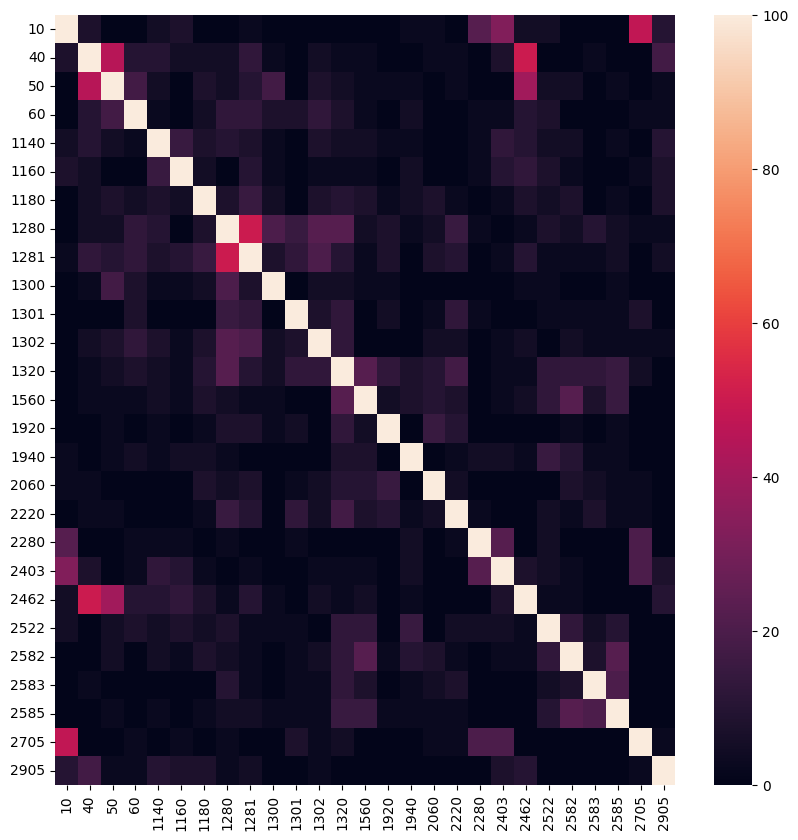

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(MAT)

**Nous pouvons déjà distinguer des catégories qui risquent de poser des problémes** :   

**les catégories 40,50 et 2462**
1.   40: 'jeux video pour pc et consoles'
2.   50: ' accesoires jeux video'
3.   2462: 'consoles de jeux video et jeux videos'
**les catégories 1280 et 1281**
1.   1280: 'jouets, peluches, puppets',
2.   1281: 'jeux de societe/cartes',
**les catégories 10, 2280, 2403 et 2705**
1.   10: 'livres'
2.   2280: 'magazines'
3.   2403: 'livres et bds'
4.   2705: 'bds et livres'